
Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAGED considerando as suas colunas.

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**.


# 01.01: importar bibliotecas

In [98]:
#ftp://ftp.mtps.gov.br/pdet/microdados/CAGED/
#ftp://ftp.mtps.gov.br/pdet/microdados/CAGED/CAGEDEST_layout_Atualizado.xls
#ftp://ftp.mtps.gov.br/pdet/microdados/CAGED/2018/CAGEDEST_122018.7z

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import subprocess

print(os.getcwd())
os.listdir()

C:\Users\eduar\Documents\03. Acadêmico\01. Data Science\Digital House\Desafio01


['.ipynb_checkpoints',
 'CAGEDEST_122018.7z',
 'CAGEDEST_122018.txt',
 'CAGEDEST_layout_Atualizado.xls',
 'Comentarios.txt',
 'Desafio1-layout.ipynb',
 'Desafio1.ipynb',
 'img',
 'os.getcwd()']

# 01.02: importar arquivos e analisar informações básicas

In [99]:
filename = 'CAGEDEST_122018.7z'
# Executa o programa 7z com o arqgumento "e" para descompactar o arquivo
subprocess.call(['C:/Program Files/7-Zip/7z.exe', 'e', filename])

# Faz a leitura do arquivo de dados. O arquivo está com encoding do tipo "latin", utiliza ";" como separador de campos e "," como separador decimal
# Utilizando o argumento decimal, simplifica o processo para a função DataFrame identificar o tipo de dado de cada coluna
temp = pd.DataFrame(pd.read_csv("CAGEDEST_122018.txt", encoding="latin", sep=";", decimal=",", low_memory=False))

# Elimina as linhas onde não há salário registrado.
dados_caged = temp[temp["Salário Mensal"] != 0]

# Cria uma cópia do dataframe original. Essa cópia será utilizada para armazenar os dados normalizados, preservando o dataframe original.
dados_caged_nmlz = dados_caged.copy()

## Comentário:
Durante a análise, identificou-se um número relevante de registros com salários zerados. Abaixo segue a análise desse dataset.

In [100]:
print("Linhas: ", temp.shape[0], 
      "Linhas zeradas: ", temp.shape[0]-dados_caged.shape[0], 
      "(", round(100*(1-dados_caged.shape[0]/temp.shape[0]),2),"%)",
      "Colunas: ", dados_caged.shape[1])


Linhas:  2256752 Linhas zeradas:  24245 ( 1.07 %) Colunas:  42


In [101]:
# Análise dos registros com salários zerados.
zerados = temp[temp["Salário Mensal"] == 0]
n=0

perc_maior_registro_df = pd.DataFrame(columns=["Campo", "Item_Amostra", "Valor_Amostra", "Item_Pop", "Valor_Pop"])
print("<---- Percentual que o registro com maior ocorrências representa no total de linhas ---->")
for i in zerados.columns:
    perc_maior_registro_df.loc[n] = [i, 
                                     list(zerados[i].value_counts().index)[0],
                                     round(100*list(zerados[i].value_counts())[0]/zerados.shape[0],2),
                                     list(dados_caged[i].value_counts().index)[0],
                                     round(100*list(dados_caged[i].value_counts())[0]/dados_caged.shape[0],2)]
    n+=1

print(perc_maior_registro_df[:].sort_values("Valor_Amostra", ascending = False))

<---- Percentual que o registro com maior ocorrências representa no total de linhas ---->
                    Campo Item_Amostra  Valor_Amostra Item_Pop  Valor_Pop
16         Salário Mensal            0         100.00      954       4.29
1   Competência Declarada       201812         100.00   201812     100.00
3           Ano Declarado         2018         100.00     2018     100.00
14     Ind Portador Defic            0          99.60        0      99.26
21             Tipo Defic            0          99.60        0      99.26
28         Regiões Adm DF            0          98.50        0      98.17
25      Bairros Fortaleza         {ñ c          94.97     {ñ c      98.18
34       Região Corede 04           99          94.93       99      92.97
33          Região Corede           {ñ          94.93       {ñ      92.99
40       Ind Trab Parcial            0          94.51        0      99.57
20             Tipo Estab            1          93.29        1      95.78
36        Região Senac

In [102]:
dados_caged.describe()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente
count,2.232507e+06,2232507.0,2.232507e+06,2232507.0,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,...,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06,2.232507e+06
mean,1.573252e+00,201812.0,3.555714e+05,2018.0,5.376137e+05,5.299520e+04,5.119081e+04,5.119090e+06,4.304638e+00,6.590149e+00,...,1.315523e+01,1.084313e+00,1.559906e-02,6.189604e+00,3.536222e+01,7.849144e-01,3.542837e+03,3.538865e+04,4.308609e-03,3.733919e-03
std,4.946052e-01,0.0,8.296439e+04,0.0,1.782223e+05,2.263752e+04,2.461305e+04,2.461304e+06,2.649150e+00,1.545216e+00,...,3.410532e+01,4.018929e-01,2.158381e-01,9.869150e+00,8.307895e+00,8.169143e+01,8.305766e+02,8.306912e+03,6.549845e-02,6.099163e-02
min,1.000000e+00,201812.0,1.100010e+05,2018.0,3.011000e+04,1.112000e+03,1.113000e+03,1.113010e+05,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.101000e+03,1.100100e+04,0.000000e+00,0.000000e+00
25%,1.000000e+00,201812.0,3.147100e+05,2018.0,4.141100e+05,4.525000e+04,4.213800e+04,4.213800e+06,2.000000e+00,6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.100000e+01,0.000000e+00,3.108000e+03,3.103900e+04,0.000000e+00,0.000000e+00
50%,2.000000e+00,201812.0,3.533400e+05,2018.0,5.174100e+05,5.241800e+04,4.772500e+04,4.772500e+06,4.000000e+00,7.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,0.000000e+00,3.512000e+03,3.504600e+04,0.000000e+00,0.000000e+00
75%,2.000000e+00,201812.0,4.118200e+05,2018.0,7.152200e+05,7.412800e+04,7.319000e+04,7.319002e+06,6.000000e+00,7.000000e+00,...,1.100000e+01,1.000000e+00,0.000000e+00,6.000000e+00,4.100000e+01,0.000000e+00,4.110000e+03,4.103700e+04,0.000000e+00,0.000000e+00
max,2.000000e+00,201812.0,5.300100e+05,2018.0,9.922250e+05,9.900700e+04,9.900800e+04,9.900800e+06,9.000000e+00,9.000000e+00,...,5.990000e+02,3.000000e+00,6.000000e+00,9.000000e+01,5.300000e+01,9.999000e+03,5.301000e+03,5.300100e+04,1.000000e+00,1.000000e+00


In [103]:
dados_caged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232507 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           float64
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            float64
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm

# 02.01: limpeza dos dados de salário

<- DADOS ORIGINAIS ->
5 Maiores Valores:
1535852    142830.0
1508854    142726.0
1283357    141480.0
1088049    140550.0
675952     140000.0
Name: Salário Mensal, dtype: float64
mean: 1644.92 std.dev: 2101.98 skew: 24.07 kurt: 1098.6

<- DADOS NORMALIZADOS ->
5 Maiores Valores:
1535852    11.869417
1508854    11.868689
1283357    11.859921
1088049    11.853326
675952     11.849405
Name: Salário Mensal, dtype: float64
mean: 7.24 std.dev: 0.47 skew: 1.75 kurt: 7.21

Cortes mínimo e máximo do histograma:
Dados originais:
Quantile :0.01: 477.0 Quantile :0.99: 8292.0 Colunas: 100.0 Fora do intervalo (%): 38584 ( 1.73 %)
Dados normalizados:
Quantile 0.01: 6.17 Quantile 0.99: 9.02 Colunas: 100.0 % fora do intervalo: 38584 ( 1.73 %)


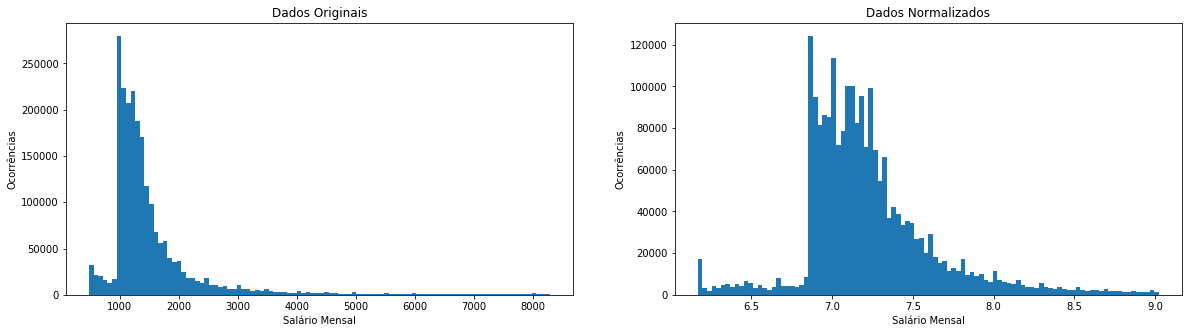

In [119]:
#Obs.: ao verificar que o caracter decimal é ",", alterei o argumento na função read_csv

def norm_e_print(dados_1, dados_2, coluna, quant_min = 0.01, quant_max = 0.99, cols_hist = 1000.0,
                 fator_reducao_cols_hist = 5):
    dados_2[coluna] = np.log1p(dados_1[coluna])
    print("<- DADOS ORIGINAIS ->")
    print("5 Maiores Valores:")
    print(dados_1[coluna].nlargest(5))
    print("mean:", round(dados_1[coluna].mean(),2),"std.dev:", round(dados_1[coluna].std(),2),
      "skew:",round(st.skew(dados_1[coluna]),2),"kurt:",round(st.kurtosis(dados_1[coluna]),2))

    print("")
    print("<- DADOS NORMALIZADOS ->")
    print("5 Maiores Valores:")
    print(dados_2[coluna].nlargest(5))
    print("mean:", round(dados_2[coluna].mean(),2),"std.dev:", round(dados_2[coluna].std(),2),
      "skew:",round(st.skew(dados_2[coluna]),2),"kurt:",round(st.kurtosis(dados_2[coluna]),2))
    
    fig, ax = plt.subplots(1, 2,figsize=(20,5))
    
    colunas_hist = cols_hist
    print("")
    print("Cortes mínimo e máximo do histograma:")
    minimo_1 = dados_1[coluna].quantile(quant_min)
    maximo_1 = dados_1[coluna].quantile(quant_max)
    qtd_acima = dados_1[dados_1["Salário Mensal"]>maximo_1]["Salário Mensal"].count()
    qtd_abaixo = dados_1[dados_1["Salário Mensal"]<minimo_1]["Salário Mensal"].count()
    qtd_fora = qtd_acima+qtd_abaixo
    qtd_total = dados_1["Salário Mensal"].count()
    print("Dados originais:")
    print("Quantile :"+str(quant_min)+":", round(minimo_1,2), 
          "Quantile :"+str(quant_max)+":", round(maximo_1,2), 
          "Colunas:", colunas_hist,
          "Fora do intervalo (%):", qtd_fora, "(", round(100*qtd_fora/qtd_total,2), "%)"
         )
    ax[0].set_title("Dados Originais")
    ax[0].set_xlabel(coluna)
    ax[0].set_ylabel("Ocorrências")
    ax[0].hist(dados_1[coluna],bins=int(round(colunas_hist,0)), range=(minimo_1, maximo_1))
    minimo_2 = dados_2[coluna].quantile(quant_min)
    maximo_2 = dados_2[coluna].quantile(quant_max)
    qtd_acima = dados_2[dados_2["Salário Mensal"]>maximo_2]["Salário Mensal"].count()
    qtd_abaixo = dados_2[dados_2["Salário Mensal"]<minimo_2]["Salário Mensal"].count()
    qtd_fora = qtd_acima+qtd_abaixo
    qtd_total = dados_2["Salário Mensal"].count()
    print("Dados normalizados:")
    print("Quantile "+str(quant_min)+":", round(minimo_2,2),
          "Quantile "+str(quant_max)+":", round(maximo_2,2),
          "Colunas:", round(colunas_hist/fator_reducao_cols_hist,0),
          "% fora do intervalo:", qtd_fora, "(", round(100*qtd_fora/qtd_total,2), "%)"
         ) 
    ax[1].set_title("Dados Normalizados")
    ax[1].set_xlabel(coluna)
    ax[1].set_ylabel("Ocorrências")
    ax[1].hist(dados_2[coluna],bins=int(round(colunas_hist/fator_reducao_cols_hist,0)), range=(minimo_2, maximo_2))
    plt.show()

norm_e_print(dados_caged, dados_caged_nmlz, "Salário Mensal")

# 02.01: limpeza dos dados de idade

<- DADOS ORIGINAIS ->
5 Maiores Valores:
1987564    103
1515144    100
417078      99
1377424     99
2244978     99
Name: Idade, dtype: int64
mean: 32.3 std.dev: 10.95 skew: 0.78 kurt: 0.1

<- DADOS NORMALIZADOS ->
5 Maiores Valores:
1987564    4.644391
1515144    4.615121
417078     4.605170
1377424    4.605170
2244978    4.605170
Name: Idade, dtype: float64
mean: 3.45 std.dev: 0.32 skew: 0.17 kurt: -0.78

Cortes mínimo e máximo do histograma:
Dados originais:
Quantile :5e-05: 14.0 Quantile :0.999: 71.0 Colunas: 56 Fora do intervalo (%): 2232507 ( 100.0 %)
Dados normalizados:
Quantile 5e-05: 2.71 Quantile 0.999: 4.28 Colunas: 28.0 % fora do intervalo: 2232507 ( 100.0 %)


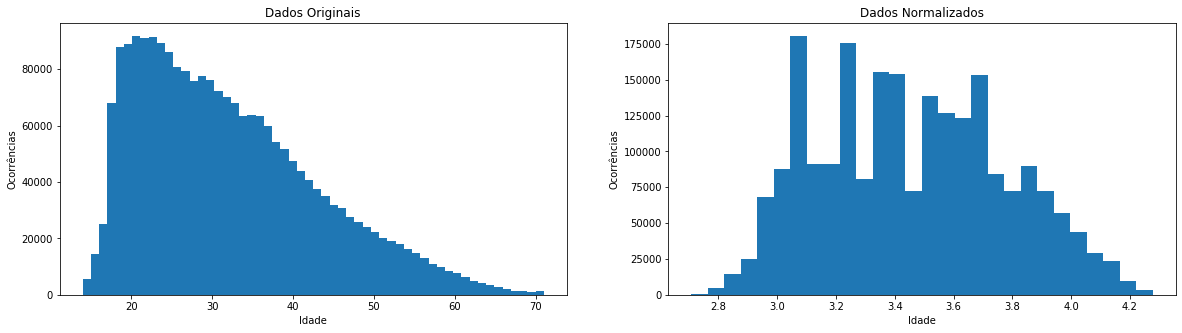

In [124]:
#Obs.: ao verificar que o caracter decimal é ",", alterei o argumento na função read_csv

norm_e_print(dados_caged, dados_caged_nmlz, "Idade", quant_min = 0.00005, quant_max = 0.999, cols_hist = 56, fator_reducao_cols_hist = 2)

# 02.02: Correlação entre idade e salário

Original: 0.3
Normalizado: 0.15


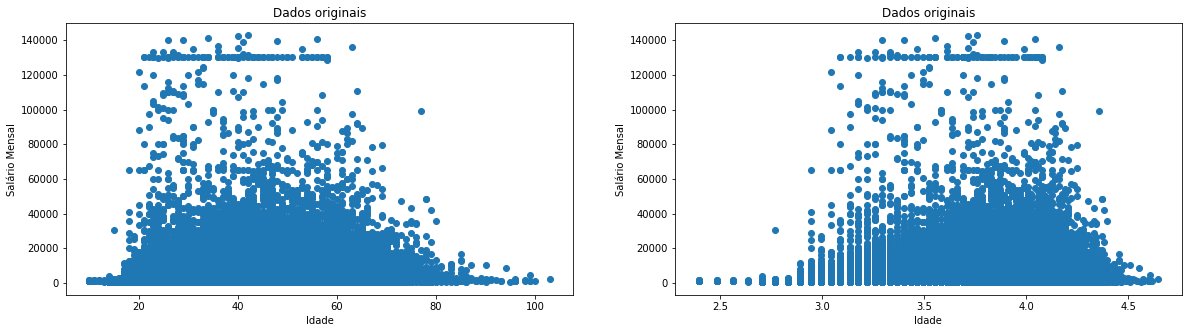

In [106]:
print("Original:", round(np.corrcoef(dados_caged_nmlz["Idade"],dados_caged_nmlz["Salário Mensal"])[0][1],2))
print("Normalizado:", round(np.corrcoef(dados_caged["Idade"],dados_caged["Salário Mensal"])[0][1],2))

fig, ax = plt.subplots(1, 2,figsize=(20,5))


ax[0].set_xlabel("Idade")
ax[0].set_ylabel("Salário Mensal")
ax[0].set_title("Dados originais")
ax[0].scatter(dados_caged["Idade"],dados_caged["Salário Mensal"])


ax[1].set_xlabel("Idade")
ax[1].set_ylabel("Salário Mensal")
ax[1].set_title("Dados originais")
ax[1].scatter(dados_caged_nmlz["Idade"],dados_caged["Salário Mensal"])
plt.show()

# 03.01: Análise Grau de instrução e correlação com salário

7    1262753
9     247027
6     199335
5     197956
4     122405
8      88328
2      59969
3      46667
1       8067
Name: Grau Instrução, dtype: int64
[7.021572128745881, 7.283737799478106, 7.150181093451529, 7.18008842391018, 7.149465694152321, 7.1931157961548, 7.1734920001676326, 7.813330997459526, 7.079083672575181]
Original: 0.26
Normalizado: 0.19


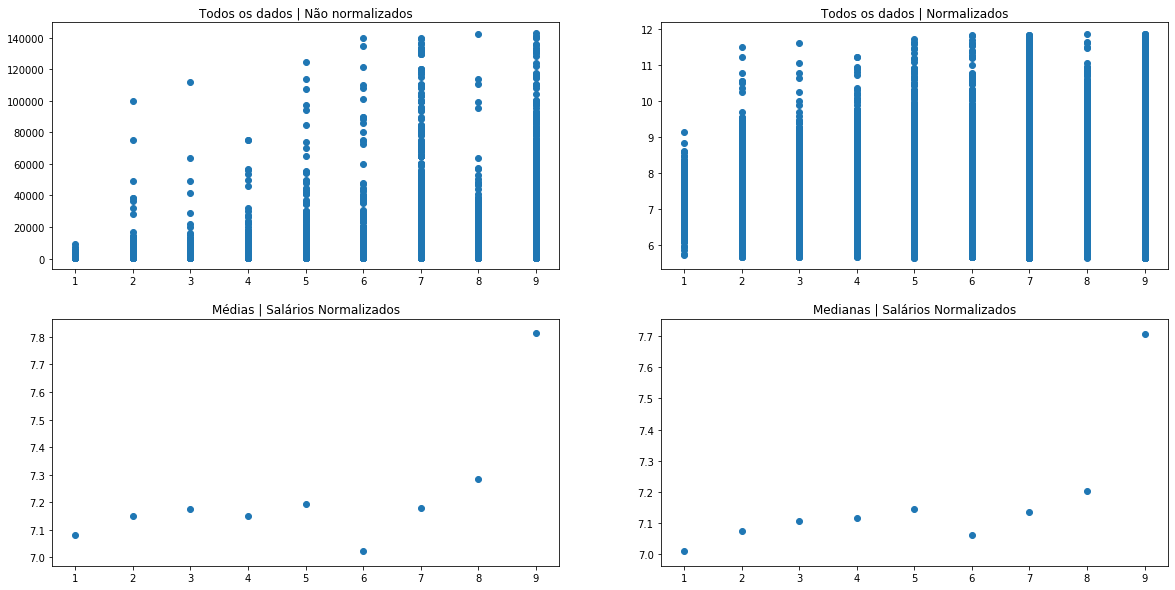

In [107]:
print(dados_caged["Grau Instrução"].value_counts())

medias = []
medianas = []

for i in dados_caged["Grau Instrução"].unique():
    medias.append(dados_caged_nmlz[dados_caged["Grau Instrução"] == i]["Salário Mensal"].mean())
    medianas.append(dados_caged_nmlz[dados_caged["Grau Instrução"] == i]["Salário Mensal"].quantile(.5))


print(medias)

print("Original:", round(np.corrcoef(dados_caged["Grau Instrução"],dados_caged_nmlz["Salário Mensal"])[0][1],2))
print("Normalizado:", round(np.corrcoef(dados_caged["Grau Instrução"],dados_caged["Salário Mensal"])[0][1],2))

fig, ax = plt.subplots(2, 2,figsize=(20,10))

ax[0,0].set_title("Todos os dados | Não normalizados")
ax[0,0].scatter(dados_caged["Grau Instrução"],dados_caged["Salário Mensal"])
ax[0,1].set_title("Todos os dados | Normalizados")
ax[0,1].scatter(dados_caged["Grau Instrução"],dados_caged_nmlz["Salário Mensal"])
ax[1,0].set_title("Médias | Salários Normalizados")
ax[1,0].scatter(dados_caged["Grau Instrução"].unique(),medias)
ax[1,1].set_title("Medianas | Salários Normalizados")
ax[1,1].scatter(dados_caged["Grau Instrução"].unique(),medianas)
plt.show()

Contagem:
 1    1310312
2     922195
Name: Sexo, dtype: int64
Original: -0.1
Normalizado: -0.04


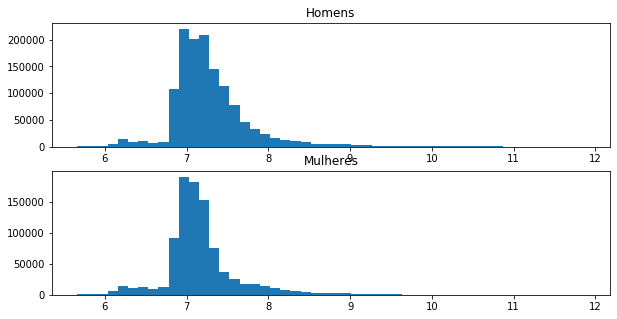

In [108]:
print("Contagem:\n", dados_caged["Sexo"].value_counts())

medias = []
medianas = []
desv_pad = []

for i in dados_caged["Sexo"].unique():
    medias.append(dados_caged_nmlz[dados_caged["Sexo"] == i]["Salário Mensal"].mean())
    desv_pad.append(dados_caged_nmlz[dados_caged["Sexo"] == i]["Salário Mensal"].std())
    medianas.append(dados_caged_nmlz[dados_caged["Sexo"] == i]["Salário Mensal"].quantile(.5))

print("Original:", round(np.corrcoef(dados_caged["Sexo"],dados_caged_nmlz["Salário Mensal"])[0][1],2))
print("Normalizado:", round(np.corrcoef(dados_caged["Sexo"],dados_caged["Salário Mensal"])[0][1],2))

"""    
plt.title("Todos os dados | Não normalizados")
plt.scatter(dados_caged["Sexo"],dados_caged["Salário Mensal"])
plt.show()
plt.title("Todos os dados | Normalizados")
plt.scatter(dados_caged["Sexo"],dados_caged_nmlz["Salário Mensal"])
plt.show()
plt.title("Médias | Salários Normalizados")
plt.scatter(dados_caged["Sexo"].unique(),medias)
plt.show()
plt.title("Medianas | Salários Normalizados")
plt.scatter(dados_caged["Sexo"].unique(),medianas)
plt.show()
"""
fig, ax = plt.subplots(2, 1,figsize=(10,5))

ax[0].set_title("Homens")
ax[0].hist(dados_caged_nmlz[dados_caged["Sexo"] == 1]["Salário Mensal"], bins=50)
ax[1].set_title("Mulheres")
ax[1].hist(dados_caged_nmlz[dados_caged["Sexo"] == 2]["Salário Mensal"], bins=50)
plt.show()


Médias:
 [7.278241804797226, 7.181533607774205]
Desvio padrão:
 [0.4788248114357451, 0.4632257239508497]


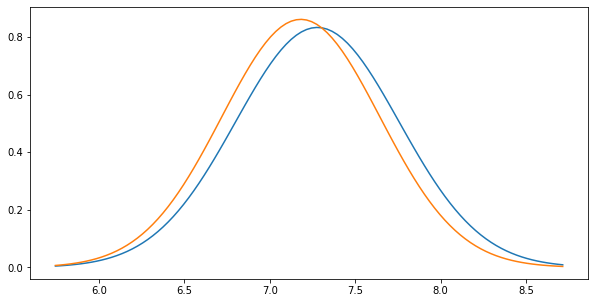

In [109]:
print("Médias:\n", medias)
print("Desvio padrão:\n", desv_pad)

fg, ax = plt.subplots(1,1,figsize=(10,5))

x = np.linspace(medias[1] - 3*desv_pad[0], medias[0] + 3*desv_pad[0], 100)
ax.plot(x, st.norm.pdf(x, medias[0], desv_pad[0]),label='Homens')
ax.plot(x, st.norm.pdf(x, medias[1], desv_pad[1]),label='Mulheres')
plt.show()


# 04.01: Análise Raça/Cor e correlação com salário

In [110]:
codigos = dados_caged_nmlz["Raça Cor"].unique()
print(codigos)
#valores = ["parda", "branca", "nao identificado", "preta", "amarela", "indigena"]
#dados_caged["Raça Cor"].replace(codigos, valores)


[8 2 9 4 6 1]


2    969145
8    807917
9    302605
4    132459
6     10857
1      9524
Name: Raça Cor, dtype: int64
[7.174311717051291, 7.308393959282515, 7.203077439726465, 7.1830787667184115, 7.350754899909039, 7.291292841834495]
Original: -0.12
Normalizado: -0.08


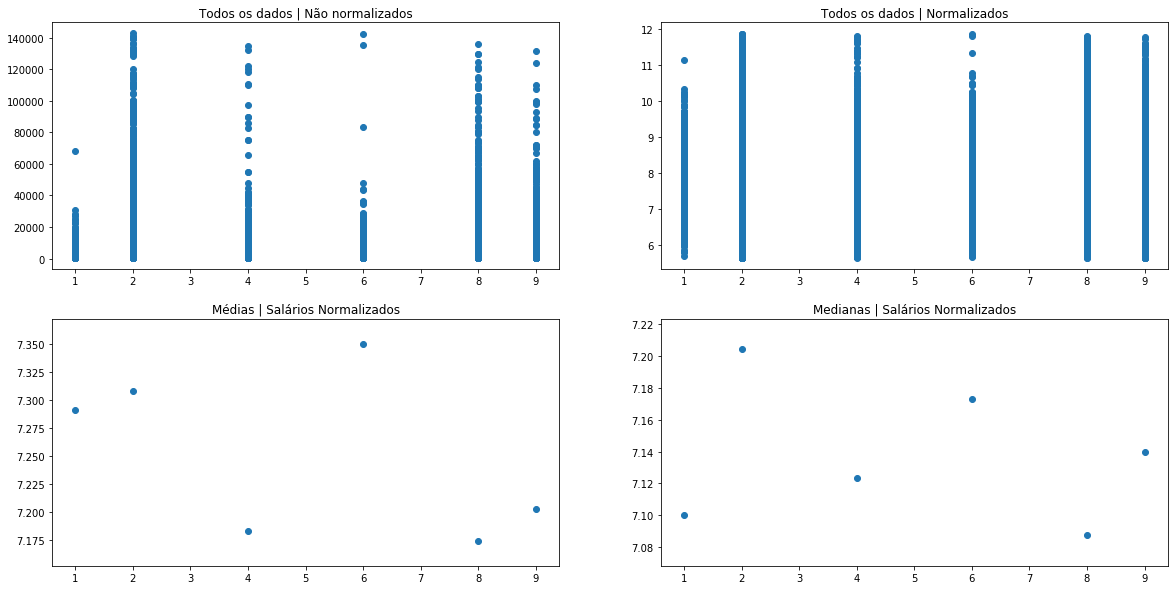

In [111]:

print(dados_caged["Raça Cor"].value_counts())

medias = []
medianas = []

for i in dados_caged["Raça Cor"].unique():
    medias.append(dados_caged_nmlz[dados_caged["Raça Cor"] == i]["Salário Mensal"].mean())
    medianas.append(dados_caged_nmlz[dados_caged["Raça Cor"] == i]["Salário Mensal"].quantile(.5))


print(medias)

print("Original:", round(np.corrcoef(dados_caged["Raça Cor"],dados_caged_nmlz["Salário Mensal"])[0][1],2))
print("Normalizado:", round(np.corrcoef(dados_caged["Raça Cor"],dados_caged["Salário Mensal"])[0][1],2))

fig, ax = plt.subplots(2, 2,figsize=(20,10))

ax[0,0].set_title("Todos os dados | Não normalizados")
ax[0,0].scatter(dados_caged["Raça Cor"],dados_caged["Salário Mensal"])
ax[0,1].set_title("Todos os dados | Normalizados")
ax[0,1].scatter(dados_caged["Raça Cor"],dados_caged_nmlz["Salário Mensal"])
ax[1,0].set_title("Médias | Salários Normalizados")
ax[1,0].scatter(dados_caged["Raça Cor"].unique(),medias)
ax[1,1].set_title("Medianas | Salários Normalizados")
ax[1,1].scatter(dados_caged["Raça Cor"].unique(),medianas)
plt.show()

# Hipótese: sob as mesmas condições (mesmo município, ocupação e setor), mulheres têm salário diferente dos homens

In [112]:
dados_caged_nmlz = dados_caged_nmlz.astype({'Município': 'str','IBGE Subsetor': 'str','CBO 2002 Ocupação': 'str'})
dados_caged_nmlz['Chave_condicao'] = dados_caged_nmlz['Município'] + dados_caged_nmlz['CBO 2002 Ocupação'] + dados_caged_nmlz['IBGE Subsetor']

colunas = [2,4,11,42]

dados_caged_nmlz.iloc[:,colunas].head()


,Município,CBO 2002 Ocupação,IBGE Subsetor,Chave_condicao
0,500215,711210,25,50021571121025
1,500710,321210,25,50071032121025
7,500540,621005,25,50054062100525
11,500660,622020,25,50066062202025
12,500060,782510,25,50006078251025


In [113]:
eventos_por_condicao = dados_caged_nmlz['Chave_condicao'].value_counts()
#print(eventos_por_condicao.head())
corte = 800
print(eventos_por_condicao[eventos_por_condicao >corte].shape)
categorias = list(eventos_por_condicao[eventos_por_condicao > corte].index)


(128,)


In [114]:
medias_homens = []
desv_pad_homens = []
qtd_homens = []
medias_mulheres = []
desv_pad_mulheres = []
qtd_mulheres = []
diferenca_H_menos_M = []

for i in categorias:
    mascara_homens = ((dados_caged_nmlz.Chave_condicao == i) & (dados_caged_nmlz.Sexo == 1))
    medias_homens.append(dados_caged_nmlz[mascara_homens]["Salário Mensal"].mean())
    desv_pad_homens.append(dados_caged_nmlz[mascara_homens]["Salário Mensal"].std())
    qtd_homens.append(dados_caged_nmlz[mascara_homens]["Salário Mensal"].count())
    
    mascara_mulheres = ((dados_caged_nmlz.Chave_condicao == i) & (dados_caged_nmlz.Sexo == 2))
    medias_mulheres.append(dados_caged_nmlz[mascara_mulheres]["Salário Mensal"].mean())
    desv_pad_mulheres.append(dados_caged_nmlz[mascara_mulheres]["Salário Mensal"].std())
    qtd_mulheres.append(dados_caged_nmlz[mascara_mulheres]["Salário Mensal"].count())
    
    diferenca_H_menos_M.append(dados_caged_nmlz[mascara_homens]["Salário Mensal"].mean() - dados_caged_nmlz[mascara_mulheres]["Salário Mensal"].mean())
    
dados_filtrados = pd.concat([pd.DataFrame(medias_homens), pd.DataFrame(desv_pad_homens), pd.DataFrame(qtd_homens), pd.DataFrame(medias_mulheres), pd.DataFrame(desv_pad_mulheres), pd.DataFrame(qtd_mulheres), pd.DataFrame(diferenca_H_menos_M)], axis=1)
dados_filtrados.columns = ["medias_homens", "desv_pad_homens", "qtd_homens", "medias_mulheres", "desv_pad_mulheres", "qtd_mulheres", "diferenca_H_menos_M"]
dados_filtrados.head()

,medias_homens,desv_pad_homens,qtd_homens,medias_mulheres,desv_pad_mulheres,qtd_mulheres,diferenca_H_menos_M
0,7.058093,0.317891,3678,7.057472,0.288493,6122,0.000620
1,7.169390,0.429460,3603,7.205656,0.365678,5969,-0.036267
2,6.981365,0.298187,2464,6.974110,0.312962,4824,0.007255
3,7.095717,0.168011,1840,7.002466,0.219522,4234,0.093251
4,7.200679,0.429181,2350,7.188928,0.366897,2811,0.011752


Média: 0.02 Desvio Padrão: 0.05


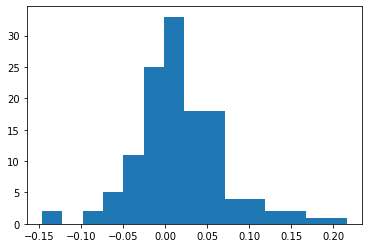

In [115]:

print("Média:", round(dados_filtrados["diferenca_H_menos_M"].mean(),2), "Desvio Padrão:", round(dados_filtrados["diferenca_H_menos_M"].std(),2))
plt.hist(dados_filtrados["diferenca_H_menos_M"], bins = 15)
dados_filtrados["Proporcao_mulheres"] = dados_filtrados["qtd_mulheres"] / (dados_filtrados["qtd_homens"] + dados_filtrados["qtd_mulheres"])
dados_filtrados["media_conjunta"] = (dados_filtrados["qtd_mulheres"]*dados_filtrados["medias_mulheres"] + 
                                     dados_filtrados["qtd_homens"]*dados_filtrados["medias_homens"])/(dados_filtrados["qtd_homens"] + 
                                                                                                      dados_filtrados["qtd_mulheres"])

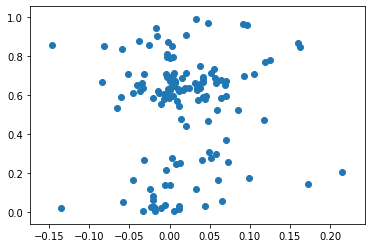

In [116]:
plt.scatter(dados_filtrados["diferenca_H_menos_M"], dados_filtrados["Proporcao_mulheres"])

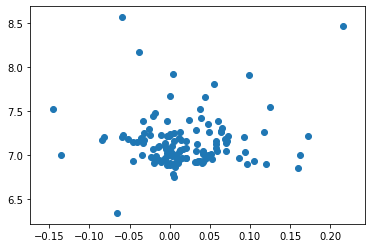

In [117]:
plt.scatter(dados_filtrados["diferenca_H_menos_M"], dados_filtrados["media_conjunta"])

# Hipótese 2: mulheres têm salário diferente dos homens em cargos de liderança (coordenação, supervisão, gerência e diretoria)

Outros                    2149337
Gerente                     36906
Supervisor/Coordenador      30152
Diretor                      2841
Name: CBO_senioridade, dtype: int64

 Média ---------> homem: 4168.37  mulher: 3288.0 
 Desvio padrão -> homem: 6542.85  mulher: 4314.53 
 Quantidade ----> homem: 50210  mulher: 32960


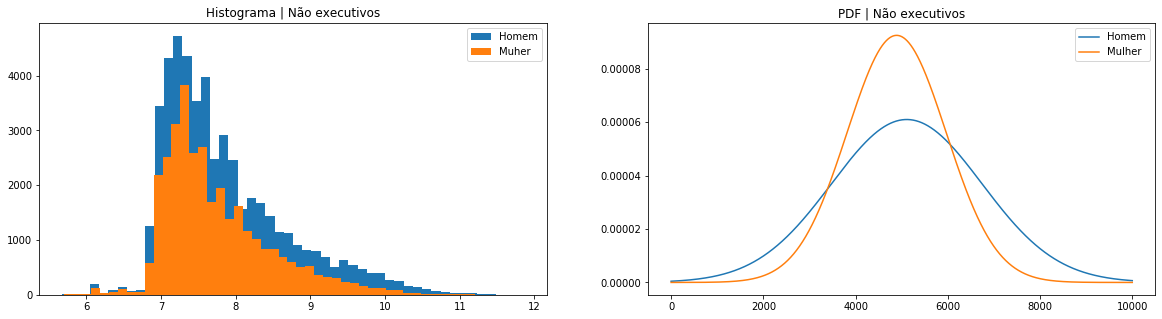

In [249]:
import warnings
warnings.filterwarnings("ignore")

dados_caged_nmlz["CBO 2002 Ocupação"] = dados_caged["CBO 2002 Ocupação"].astype("str")
de_para_CBO = pd.DataFrame(pd.read_excel("CAGEDEST_layout_Atualizado.xls", sheet_name="cbo2002"))
de_para_CBO["codigo"], de_para_CBO["descricao"] = de_para_CBO['CBO 2002 Ocupação'].str.split(':', 1).str
de_para_CBO["senioridade"] = "Outros"
de_para_CBO["senioridade"][de_para_CBO["descricao"].str.contains("Diretor")] = "Diretor"
de_para_CBO["senioridade"][de_para_CBO["descricao"].str.contains("Gerente")] = "Gerente"
de_para_CBO["senioridade"][de_para_CBO["descricao"].str.contains("Supervisor")] = "Supervisor/Coordenador"
de_para_CBO["senioridade"][de_para_CBO["descricao"].str.contains("Coordenador")] = "Supervisor/Coordenador"
de_para_CBO["senioridade"].value_counts()


di_desc = pd.Series(de_para_CBO["descricao"].values,index=de_para_CBO["codigo"]).to_dict()
di_senr = pd.Series(de_para_CBO["senioridade"].values,index=de_para_CBO["codigo"]).to_dict()
dados_caged["CBO_descricao"] = dados_caged["CBO 2002 Ocupação"]
dados_caged["CBO_descricao"] = dados_caged["CBO_descricao"].map(di_desc)
dados_caged["CBO_senioridade"] = dados_caged["CBO 2002 Ocupação"]
dados_caged["CBO_senioridade"] = dados_caged["CBO_senioridade"].map(di_senr)

print(dados_caged["CBO_senioridade"].value_counts())

mascara_homens = (dados_caged["Sexo"] == 1) & (dados_caged["CBO_senioridade"] != "Outros")
mascara_mulheres = (dados_caged["Sexo"] == 2) & (dados_caged["CBO_senioridade"] != "Outros")

media_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].mean()
media_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].mean()
desv_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].std()
desv_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].std()
qtd_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].count()
qtd_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].count()

print ("\n",
       "Média ---------> homem:", round(media_homens,2), " mulher:", round(media_mulheres, 2), "\n",
       "Desvio padrão -> homem:", round(desv_homens,2)," mulher:",  round(desv_mulheres, 2), "\n",
       "Quantidade ----> homem:", round(qtd_homens,2)," mulher:",  round(qtd_mulheres, 2))

espaco = np.linspace(media_mulheres-3*desv_homens, media_homens+3*desv_homens, 10000)
fig, ax = plt.subplots(1, 2,figsize=(20,5))

ax[0].set_title("Histograma | Não executivos")
ax[0].hist(dados_caged_nmlz.loc[mascara_homens, "Salário Mensal"], bins=50, label="Homem")
ax[0].hist(dados_caged_nmlz.loc[mascara_mulheres, "Salário Mensal"], bins=50, label="Muher")
ax[0].legend()

ax[1].set_title("PDF | Não executivos")
ax[1].plot(st.norm.pdf(espaco, media_homens, desv_homens),label='Homem')
ax[1].plot(st.norm.pdf(espaco, media_mulheres, desv_mulheres),label='Mulher')
ax[1].legend()
plt.show()



 Média ---------> homem: 5258.18  mulher: 3879.55 
 Desvio padrão -> homem: 6541.05  mulher: 4654.58 
 Quantidade ----> homem: 21431  mulher: 15475


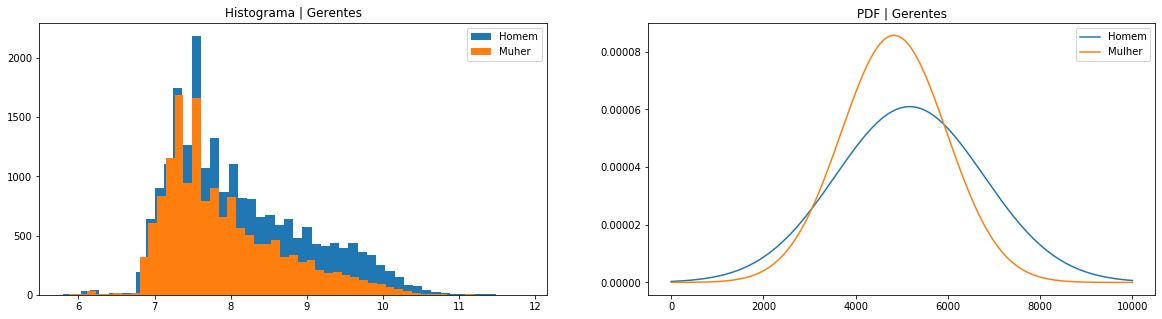

In [250]:
mascara_homens = (dados_caged["Sexo"] == 1) & (dados_caged["CBO_senioridade"] == "Gerente")
mascara_mulheres = (dados_caged["Sexo"] == 2) & (dados_caged["CBO_senioridade"] == "Gerente")

media_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].mean()
media_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].mean()
desv_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].std()
desv_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].std()
qtd_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].count()
qtd_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].count()

print ("\n",
       "Média ---------> homem:", round(media_homens,2), " mulher:", round(media_mulheres, 2), "\n",
       "Desvio padrão -> homem:", round(desv_homens,2)," mulher:",  round(desv_mulheres, 2), "\n",
       "Quantidade ----> homem:", round(qtd_homens,2)," mulher:",  round(qtd_mulheres, 2))

espaco = np.linspace(media_mulheres-3*desv_homens, media_homens+3*desv_homens, 10000)
fig, ax = plt.subplots(1, 2,figsize=(20,5))

ax[0].set_title("Histograma | Gerentes")
ax[0].hist(dados_caged_nmlz.loc[mascara_homens, "Salário Mensal"], bins=50, label="Homem")
ax[0].hist(dados_caged_nmlz.loc[mascara_mulheres, "Salário Mensal"], bins=50, label="Muher")
ax[0].legend()

ax[1].set_title("PDF | Gerentes")
ax[1].plot(st.norm.pdf(espaco, media_homens, desv_homens),label='Homem')
ax[1].plot(st.norm.pdf(espaco, media_mulheres, desv_mulheres),label='Mulher')
ax[1].legend()
plt.show()



 Média ---------> homem: 17185.46  mulher: 7442.03 
 Desvio padrão -> homem: 19994.81  mulher: 11632.26 
 Quantidade ----> homem: 1665  mulher: 1176


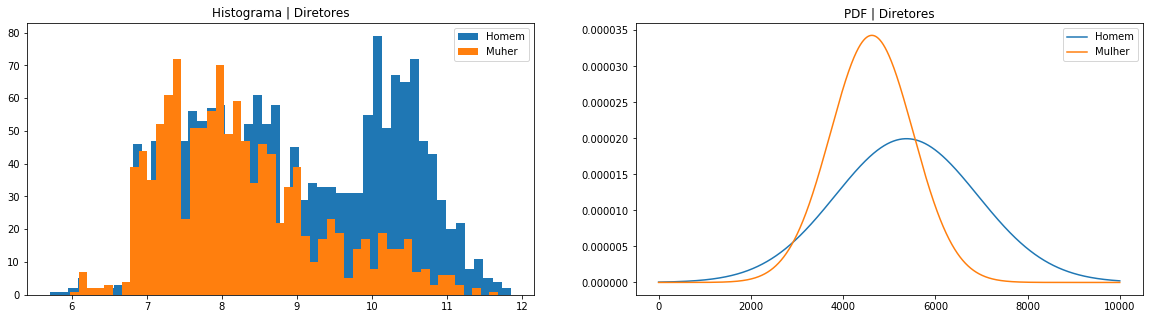

In [252]:
mascara_homens = (dados_caged["Sexo"] == 1) & (dados_caged["CBO_senioridade"] == "Diretor")
mascara_mulheres = (dados_caged["Sexo"] == 2) & (dados_caged["CBO_senioridade"] == "Diretor")

media_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].mean()
media_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].mean()
desv_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].std()
desv_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].std()
qtd_homens = dados_caged.loc[mascara_homens, "Salário Mensal"].count()
qtd_mulheres = dados_caged.loc[mascara_mulheres, "Salário Mensal"].count()

print ("\n",
       "Média ---------> homem:", round(media_homens,2), " mulher:", round(media_mulheres, 2), "\n",
       "Desvio padrão -> homem:", round(desv_homens,2)," mulher:",  round(desv_mulheres, 2), "\n",
       "Quantidade ----> homem:", round(qtd_homens,2)," mulher:",  round(qtd_mulheres, 2))

espaco = np.linspace(media_mulheres-3*desv_homens, media_homens+3*desv_homens, 10000)
fig, ax = plt.subplots(1, 2,figsize=(20,5))

ax[0].set_title("Histograma | Diretores")
ax[0].hist(dados_caged_nmlz.loc[mascara_homens, "Salário Mensal"], bins=50, label="Homem")
ax[0].hist(dados_caged_nmlz.loc[mascara_mulheres, "Salário Mensal"], bins=50, label="Muher")
ax[0].legend()

ax[1].set_title("PDF | Diretores")
ax[1].plot(st.norm.pdf(espaco, media_homens, desv_homens),label='Homem')
ax[1].plot(st.norm.pdf(espaco, media_mulheres, desv_mulheres),label='Mulher')
ax[1].legend()
plt.show()
